In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi, inf
from sympy import limit
import time
from scipy.special import jv 
from itertools import product
import time
from scipy import real

In [2]:
# Parameters 
data1 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "e2" : 1, "n1" : 1, 'n2' : 1.65, "theta1" : 0, "theta2" : pi,  'w' : 1}
data1['w'] = data1['c']*2*pi/(600*10**(-9))
data1["m2"] = 0.48 #(np.sqrt(0.48**2 + 17.3**2)*4*pi*10**(-7) + 1)
data1["delta"] = data1["alpha"]*data1["m1"]*data1["m2"]*(data1["theta2"] - data1["theta1"])/pi
data1["k1"] = data1["n1"]*data1["w"]/data1["c"]
# data1["n2"] = np.sqrt(data1['e2']*data1['m2'])
data1['e2'] = data1['n2']/(data1['m2']**2)
data1["k2"] = data1["n2"]*data1["w"]/data1["c"]
data1['scale'] = 1 

data2 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "e2" : 1, "n1" : 1, "theta1" : 0, "theta2" : 0,  'w' : 1}
data2['w'] = data2['c']*2*pi/(600*10**(-9))
data2["m2"] = 2
data2["delta"] = data2["alpha"]*data2["m1"]*data2["m2"]*(data2["theta2"] - data2["theta1"])/pi
data2["k1"] = data2["n1"]*data2["w"]/data2["c"]
data2["n2"] = np.sqrt(data2['e2']*data2['m2'])
data2["k2"] = data2["n2"]*data2["w"]/data2["c"]
data2['scale'] = 1 

dataMu2 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "theta1" : 0, "theta2" : pi, "theta3": 0,  "w" : 1}
dataMu2['w'] = dataMu2['c']*2*pi/(600*10**(-9))
dataMu2["e2"] = 1
dataMu2["m2"] = 2
dataMu2["n2"] = np.sqrt(dataMu2["m2"]*dataMu2["e2"])
dataMu2["e3"] = 1
dataMu2["m3"] = 10**5
dataMu2["n3"] = 10**(5/2)
dataMu2["k1"] = dataMu2["n1"]*dataMu2["w"]/dataMu2["c"]
dataMu2["k2"] = dataMu2["n2"]*dataMu2["w"]/dataMu2["c"]
dataMu2["k3"] = dataMu2["n3"]*dataMu2["w"]/dataMu2["c"]
dataMu2["delta"] = dataMu2["alpha"]*dataMu2["m1"]*dataMu2["m2"]*(dataMu2["theta1"] - dataMu2["theta2"])/pi
dataMu2["scale"] = 1
dataMu2["dist12"] = 100*10**(-9) #esto esta a escala 600nm (son 100nm - visto de un paper en donde trbajaban con thin films de 1000 Amstrong)
dataMu2["dist23"] = 0

In [3]:
# Reflexion and Transmission Matrix coeffs 
def Rtmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs): 
    thingy = ( (e2*np.sqrt(k1**2-kp**2)-e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Rtetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Rtete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = ( (m2*np.sqrt(k1**2-kp**2)-m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Rtmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Ttmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = n2/n1 * (2*e1*np.sqrt(k1**2-kp**2))*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2)))/ ( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy
    
def Ttetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Ttmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = 2*m2*n2*np.sqrt(k1**2-kp**2)**2*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Ttete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = 2*m2*np.sqrt(k1**2-kp**2)*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2)))/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return (((np.sqrt(k2**2-kp**2))/(np.sqrt(k1**2-kp**2)))*(m1/m2))*np.abs(thingy)**2

In [4]:
# Reflection Matrix 3-Layer
def ReflectiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
    # print(e1, e2, k1, k2, m1, m2, n1, n2)
    return np.array([[Rtete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Rtetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)], [Rtmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Rtmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)]])

def TransmisiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
    return np.array([[Ttete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Ttetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)], [Ttmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Ttmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)]])

def VelocityMatrix(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha):
    delta21 =  alpha*m2*m1*(theta1 - theta2)/pi
    delta23 =  alpha*m2*m3*(theta3 - theta2)/pi
    r21 = ReflectiveMatrix(kp, e2, e1, k2, k1, m2, m1, n2, n1, delta21, c)
    r23 = ReflectiveMatrix(kp, e2, e3, k2, k3, m2, m3, n2, n3, delta23, c)
    return np.array([[1,0],[0,1]]) - np.e**(2j*np.sqrt(k2**2-kp**2)*(dist12-dist23))*(r21.dot(r23))

def ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha):
    # print(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)
    delta21 =  alpha*m2*m1*(theta1 - theta2)/pi
    delta23 =  alpha*m2*m3*(theta3 - theta2)/pi
    delta12 =  alpha*m1*m2*(theta2 - theta1)/pi
    r12 = ReflectiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta12, c)
    t21 = TransmisiveMatrix(kp, e2, e1, k2, k1, m2, m1, n2, n1, delta21, c)
    r23 = ReflectiveMatrix(kp, e2, e3, k2, k3, m2, m3, n2, n3, delta23, c)
    M = np.linalg.inv(VelocityMatrix(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha))
    t12 = TransmisiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta12, c)
    M2 = t21.dot(r23).dot(M).dot(t12)
    return  r12 + np.e**(-2j*np.sqrt(k2**2-kp**2)*(dist23-dist12))*M2


def RteteMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[0,0]
    return thingy

def RtetmMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[0,1]
    return thingy

def RtmtmMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[1,1]
    return thingy

def RtmteMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[1,0]
    return thingy

In [5]:
#G0
def G0(x,y,z,zp=1.5*600*10**(-9),xp=0,yp=0,data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    w = data['w']
    k = data['k1']
    R = np.sqrt((x-xp)**2+(y-yp)**2+(z-zp)**2)
    Id = np.array([[1,0,0],[0,1,0],[0,0,1]])
    Rv = np.array([x-xp,y-yp,z-zp])
    thing = np.e**(1j*k*R)/(4*pi*R)*((1 + (1j*k*R-1)/(k**2*R**2))*Id+ (3-3j*k*R-k**2*R**2)/(k**2*R**4)*np.outer(Rv,Rv))
    return thing

def G0_xx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    thing = np.imag(G0(x,y,z,zp=zp,data=data)[0,0])
    if abs(thing) >= 10**(9): return 0
    return thing

def G0_yx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[1,0])

def G0_zx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[2,0])

def G0_xy(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[0,1])

def G0_yy(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[1,1])

def G0_zy(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[2,1])

def G0_xz(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[0,2])

def G0_yz(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[1,2])

def G0_zz(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[2,2])

G0zz = np.vectorize(G0_zz)
G0yz = np.vectorize(G0_yz)
G0xz = np.vectorize(G0_xz)
G0xx = np.vectorize(G0_xx)
G0yx = np.vectorize(G0_yx)
G0zx = np.vectorize(G0_zx)
G0xy = np.vectorize(G0_xy)
G0yy = np.vectorize(G0_yy)
G0zy = np.vectorize(G0_zy)

In [6]:
# Green 2-Layers
def GRzz_integrand(kp, x, y, z, zp, data=data1):
    k1 = data["k1"]
    return np.imag((1j/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(0,kp*np.sqrt(x**2+y**2))*(kp**3/(k1**2*np.sqrt(k1**2-kp**2)))*Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"]))

def GRyz_integrand(kp, x, y, z, zp, data=data1):
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"]))

def GRxz_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm)

def GRxx_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtete = Rtete(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))

def GRyx_integrand(kp, x, y, z, zp, data=data1):
    rtetm = Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtmte = Rtmte(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((-1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte))

def GRzx_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((-1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm)

def GRyy_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtete = Rtete(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))

def GRxy_integrand(kp, x, y, z, zp, data=data1):
    rtetm = Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtmte = Rtmte(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte))

def GRzy_integrand(kp, x, y, z, zp, data=data1):
    rtmte = Rtmte(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*rtmte)

In [7]:
def G_xz(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRxz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_yz(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRyz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_zz(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRzz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_xx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRxx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_yx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRyx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_zx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRzx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_xy(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRxy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_yy(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRyy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_zy(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRzy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

Gzz = np.vectorize(G_zz)
Gyz = np.vectorize(G_yz)
Gxz = np.vectorize(G_xz)
Gxx = np.vectorize(G_xx)
Gyx = np.vectorize(G_yx)
Gzx = np.vectorize(G_zx)
Gxy = np.vectorize(G_xy)
Gyy = np.vectorize(G_yy)
Gzy = np.vectorize(G_zy)

In [8]:
# Green 3-Layers
def GRMuzz_integrand(kp, x, y, z, zp, data=dataMu2):
    k1 = data["k1"]
    return np.imag((1j/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(0,kp*np.sqrt(x**2+y**2))*(kp**3/(k1**2*np.sqrt(k1**2-kp**2)))*RtmtmMU(kp, **data))

def GRMuyz_integrand(kp, x, y, z, zp, data=dataMu2):
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*RtetmMU(kp, **data))

def GRMuxz_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmtm = RtmtmMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm)

def GRMuxx_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmtm = RtmtmMU(kp, **data)
    rtete = RteteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))

def GRMuyx_integrand(kp, x, y, z, zp, data=dataMu2):
    rtetm = RtetmMU(kp, **data)
    rtmte = RtmteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((-1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte))

def GRMuzx_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmtm = RtmtmMU(kp, **data)
    k1 = data["k1"]
    return np.imag((-1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm)

def GRMuyy_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmtm = RtmtmMU(kp, **data)
    rtete = RteteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))

def GRMuxy_integrand(kp, x, y, z, zp, data=dataMu2):
    rtetm = RtetmMU(kp, **data)
    rtmte = RtmteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte))

def GRMuzy_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmte = RtmteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*rtmte)


In [9]:
def GMu_xz(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuxz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_yz(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuyz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_zz(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuzz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_xx(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuxx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_yx(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuyx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_zx(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuzx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_xy(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuxy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_yy(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuyy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_zy(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuzy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

GMuzz = np.vectorize(GMu_zz)
GMuyz = np.vectorize(GMu_yz)
GMuxz = np.vectorize(GMu_xz)
GMuxx = np.vectorize(GMu_xx)
GMuyx = np.vectorize(GMu_yx)
GMuzx = np.vectorize(GMu_zx)
GMuxy = np.vectorize(GMu_xy)
GMuyy = np.vectorize(GMu_yy)
GMuzy = np.vectorize(GMu_zy)

In [10]:
# PLDOS, LDOS and Lifetime 
def rho_xz(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gxz(0,0,z,z,data)

def rho_yz(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gyz(0,0,z,z,data)

def rho_zz(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gzz(0,0,z,z,data)

def rho_xx(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gxx(0,0,z,z,data)

def rho_yx(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gyx(0,0,z,z,data)

def rho_zx(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gzx(0,0,z,z,data)

def rho_xy(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gxy(0,0,z,z,data)

def rho_yy(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gyy(0,0,z,z,data)

def rho_zy(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gzy(0,0,z,z,data)

def ldos(z, data=data1):
    return 1 + ((2*pi*data['c']*data['n1']**2)/(data['w']))*(Gxx(0,0,z,z,data=data)+Gyy(0,0,z,z,data=data)+Gzz(0,0,z,z,data=data))

def lifetime(z, data=data1, t_inf=1, eta=1):
    return t_inf/(1 + eta*(ldos(z, data=data) - 1))

In [11]:
# PLDOS, LDOS and Lifetime 3-Layer
def rhoMu_xz(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*GMuxz(0,0,z,z,data)

def rhoMu_yz(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*GMuyz(0,0,z,z,data)

def rhoMu_zz(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*GMuzz(0,0,z,z,data)

def rhoMu_xx(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*GMuxx(0,0,z,z,data)

def rhoMu_yx(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*GMuyx(0,0,z,z,data)

def rhoMu_zx(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*GMuzx(0,0,z,z,data)

def rhoMu_xy(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*GMuxy(0,0,z,z,data)

def rhoMu_yy(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*GMuyy(0,0,z,z,data)

def rhoMu_zy(z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*GMuzy(0,0,z,z,data)

def ldosMu(z, data=data1):
    return 1 + ((2*pi*data['c']*data['n1']**2)/(data['w']))*(GMuxx(0,0,z,z,data=data)+GMuyy(0,0,z,z,data=data)+GMuzz(0,0,z,z,data=data))

def lifetimeMu(z, data=data1, t_inf=1, eta=1):
    return t_inf/(1 + eta*(ldosMu(z, data=data) - 1))

In [12]:
# Calculating PLDOS 2-Layer
z = np.arange(0,2, 0.01)*600*10**(-9)

start = time.time()
rzz_points1 = rho_zz(z, data=data1)
rzz_points2 = rhoMu_zz(z, data=dataMu2)
end = time.time()
print('** elapsed time for rzz calculations: {} seg'.format(end - start))

start = time.time()
rxx_points1 = rho_xx(z, data=data1)
rxx_points2 = rhoMu_xx(z, data=dataMu2)
end = time.time()
print('** elapsed time for rxx calculations: {} seg'.format(end - start))

start = time.time()
ryy_points1 = rho_yy(z, data=data1)
ryy_points2 = rhoMu_yy(z, data=dataMu2)
end = time.time()
print('** elapsed time for ryy calculations: {} seg'.format(end - start))

r_parall1 = (ryy_points1 + rxx_points1)/2
r_parall2 = (ryy_points2 + rxx_points2)/2

start = time.time()
ldos_points1 = (2*r_parall1+rzz_points1)
ldos_points2 = (2*r_parall2+rzz_points2)
end = time.time()
print('** elapsed time for ldos calculations: {} seg'.format(end - start))

start = time.time()
lifetime_points1 = lifetime(z, data=data1)
lifetime_points2 = lifetime(z, data=data1, eta=0.61)
end = time.time()
print('** elapsed time for lifetime calculations: {} seg'.format(end - start))

<ipython-input-7-ea53fea771fe>:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRzz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-6-3970f2701259>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return np.imag((1j/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(0,kp*np.sqrt(x**2+y**2))*(kp**3/(k1**2*np.sqrt(k1**2-kp**2)))*Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"]))
<ipython-input-7-ea53fea771fe>:11: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return quad(GRzz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-9-56da24b9c090>:11: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned res

In [13]:
start = time.time()
ldos_points1 = ldos(z, data=dataMu2)
ldos_points2 = ldosMu(z, data=dataMu2)
end = time.time()
print('** elapsed time for ldos calculations: {} seg'.format(end - start))

<ipython-input-7-ea53fea771fe>:15: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRxx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-7-ea53fea771fe>:15: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(GRxx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-7-ea53fea771fe>:31: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRyy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-7-ea53fea771fe>:31: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output =

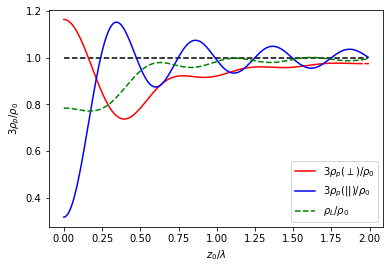

In [14]:
fig, ax = plt.subplots()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

base_line, = ax.plot(z/(600*10**(-9)), [1 for _ in z], linestyle='--', color= 'black')
perp, = ax.plot(z/(600*10**(-9)), rzz_points1, label=r'$3\rho_p(\perp)/\rho_0$', color= 'red') 
parall, = ax.plot(z/(600*10**(-9)), r_parall1, label=r'$3\rho_p(||)/\rho_0$', color= 'blue')
gldos, = ax.plot(z/(600*10**(-9)), ldos_points1, linestyle='--', label=r'$\rho_L/\rho_0$', color= 'green')

ax.legend(handles=[perp,parall, gldos], prop={'size': 10})
ax.set_xlabel(r'$z_0/\lambda$')
ax.set_ylabel(r'$3\rho_p/\rho_0$')
plt.show()

#fig.savefig('Plots/pldos_and_ldos_TI_big_theta.png', bbox_inches='tight')

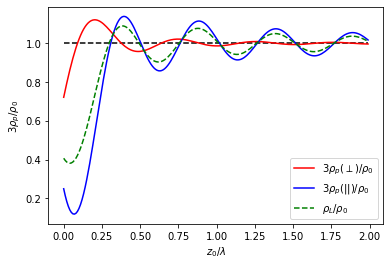

In [15]:
fig, ax = plt.subplots()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

base_line, = ax.plot(z/(600*10**(-9)), [1 for _ in z], linestyle='--', color= 'black')
perp, = ax.plot(z/(600*10**(-9)), rzz_points2, label=r'$3\rho_p(\perp)/\rho_0$', color= 'red') 
parall, = ax.plot(z/(600*10**(-9)), r_parall2, label=r'$3\rho_p(||)/\rho_0$', color= 'blue')
gldos, = ax.plot(z/(600*10**(-9)), ldos_points2, linestyle='--', label=r'$\rho_L/\rho_0$', color= 'green')

ax.legend(handles=[perp,parall, gldos], prop={'size': 10})
ax.set_xlabel(r'$z_0/\lambda$')
ax.set_ylabel(r'$3\rho_p/\rho_0$')
plt.show()

#fig.savefig('Plots/pldos_and_ldos_MD.png', bbox_inches='tight')

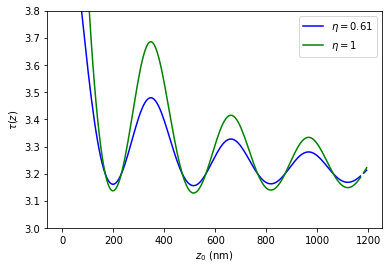

In [26]:
fig, ax = plt.subplots()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

parall, = ax.plot(z/(10**(-9)), lifetime_points2*3.2, label=r'$\eta=0.61$', color= 'blue')
perp, = ax.plot(z/(10**(-9)), lifetime_points1*3.2, label=r'$\eta=1$', color= 'green') 


ax.legend(handles=[parall,perp], prop={'size': 10})
ax.set_xlabel(r'$z_0$ (nm)')
ax.set_ylabel(r'$\tau(z)$')
ax.set_ylim([3,3.8])
fig.savefig('Plots/lifetime_hBn.png', bbox_inches='tight')